In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os_sep = os.path.abspath(os.sep)
wd = os.getcwd()
dfs = os.path.join(os_sep, wd, 'opensmile', 'egemaps_summary_turns')

In [3]:
pauses = 'MeanUnvoicedSegmentLength'
syll_rate = 'VoicedSegmentsPerSec'
pitch = 'F0semitoneFrom27.5Hz_sma3nz_amean'
loudness = 'loudness_sma3_amean'
pitch_var = 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm'

features = [pauses, syll_rate, pitch, loudness, pitch_var]
labels = ['pauses', 'syllable rate', 'pitch', 'loudness', 'pitch variability']

In [4]:
ch1_files = []
ch2_files = []

for file in sorted(glob.glob(dfs + '/*.csv')):
    if 'ch1' in file:
        ch1_files.append(file)
    else:
        ch2_files.append(file)

#### Plot histograms for all features across all interviews

KeyboardInterrupt: 

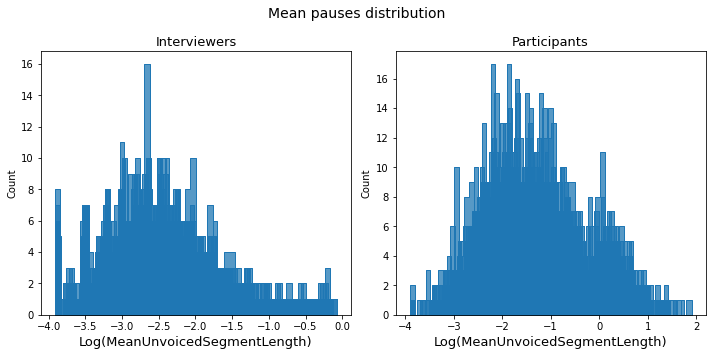

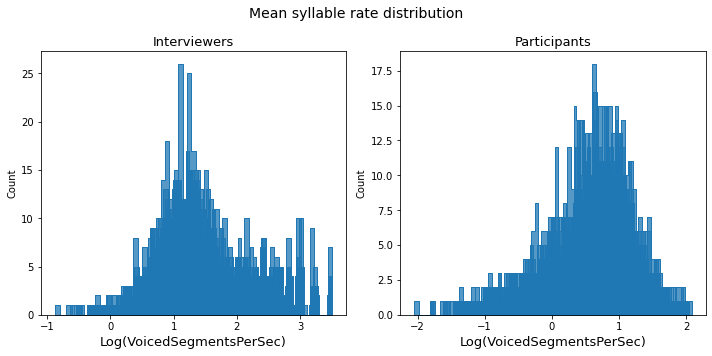

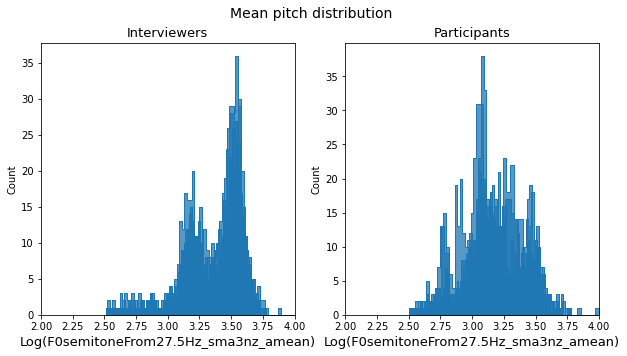

In [6]:
for i, feature in enumerate(features):
    
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (10, 5))
    plt.suptitle(f'Mean {labels[i]} distribution', size = 14)
    

    for ch1_file, ch2_file in zip(ch1_files, ch2_files):
        
        df_ch1 = pd.read_csv(ch1_file, sep = ';')
        df_ch2 = pd.read_csv(ch2_file, sep = ';')
        
        
        df_ch1.loc[df_ch1['F0semitoneFrom27.5Hz_sma3nz_amean'] == 0.0, 
                   ['loudness_sma3_amean', 'VoicedSegmentsPerSec', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm']] = 0.0
        df_ch1 = df_ch1.replace(0.0, np.nan)
        
        df_ch2.loc[df_ch2['F0semitoneFrom27.5Hz_sma3nz_amean'] == 0.0, 
                   ['loudness_sma3_amean', 'VoicedSegmentsPerSec', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm']] = 0.0
        df_ch2 = df_ch2.replace(0.0, np.nan)
    
    
        log_df1 = df_ch1[feature].map(lambda i: np.log(i) if i > 0 else np.nan) 
        
        sns.histplot(data = log_df1, element="step", bins = 50, ax = ax1)
        ax1.set_title('Interviewers', size = 13)
        ax1.set_xlabel(f'Log({features[i]})', size = 13)
        #ax1.set_xlim(-4, 4)
        
        log_df2 = df_ch2[feature].map(lambda i: np.log(i) if i > 0 else np.nan) 
        
        sns.histplot(data = log_df2, element="step", bins=50, ax = ax2)
        ax2.set_title('Participants', size = 13)
        ax2.set_xlabel(f'Log({features[i]})', size = 13)
        #ax2.set_xlim(-4, 4)
        
        if feature == 'F0semitoneFrom27.5Hz_sma3nz_amean':
        #    xmin, xmax = ax1.get_xlim()
            ax1.set_xlim((2, 4))
            ax2.set_xlim((2, 4))
        
        if feature == 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm':
            
            ax1.set_xlim((-8, 0))
            ax2.set_xlim((-8, 0))


    plt.tight_layout()

#### Plot histograms for Patients vs. Controls

In [7]:
control = np.loadtxt(os.path.join('control_subs.txt'), dtype= str)
sz = np.loadtxt(os.path.join('patient_subs.txt'), dtype= str)

In [8]:
patient_files = []
control_files = []

for file in sorted(glob.glob(dfs + '/*.csv')):
    if 'ch1' in file:
        continue
    else:
        if os.path.basename(file)[:4] in control:
            control_files.append(file)
            
        elif os.path.basename(file)[:4] in sz:
            patient_files.append(file)

In [ ]:
x_lims = [(0, 10), (0, 5), (0, 40), (0, 2)]

for i, feature in enumerate(features):
    
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (10, 5))
    plt.suptitle(f'Mean {labels[i]} distribution')
    
    for patient_file in patient_files:
        
        df = pd.read_csv(patient_file, sep = ';')
        
        
        df.loc[df['F0semitoneFrom27.5Hz_sma3nz_amean'] == 0.0, 
                   ['loudness_sma3_amean', 'VoicedSegmentsPerSec', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm']] = 0.0
        df = df.replace(0.0, np.nan)
        
        log_df = df[feature].map(lambda i: np.log(i) if i > 0 else np.nan) 

        sns.histplot(data = log_df, element="step", bins = 50, ax = ax1)
        ax1.set_title('Patients')
                
    for control_file in control_files:
        
        df = pd.read_csv(control_file, sep = ';')
        
        df.loc[df['F0semitoneFrom27.5Hz_sma3nz_amean'] == 0.0, 
                   ['loudness_sma3_amean', 'VoicedSegmentsPerSec', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm']] = 0.0
        df = df.replace(0.0, np.nan)
        
        log_df = df[feature].map(lambda i: np.log(i) if i > 0 else np.nan) 

        sns.histplot(data = log_df, element="step", bins=50, ax = ax2)
        ax2.set_title('Controls')
        
    plt.tight_layout()

#### Plot examples of features for a clip of audio data

In [9]:
from librosa import load

offset = 0.
dur = 90.

audio_dir = os.path.join('/Volumes', 'backup', 'participants', 'audio', 'split_channels')

ch1, sr = load(os.path.join(audio_dir, 'file_ch1.wav'))
ch2, sr = load(os.path.join(audio_dir, 'file_ch2.wav'))

In [10]:
df_ch1_load = pd.read_csv('/opensmile/egemaps_summary_turns_zero_filtered/file_ch1_zero_drop.csv', sep =';')
df_ch2_load = pd.read_csv('/opensmile/egemaps_summary_turns_zero_filtered/file_ch2_zero_drop.csv', sep =';')

In [11]:
df_ch1 = df_ch1_load.loc[df_ch1_load['F0semitoneFrom27.5Hz_sma3nz_amean'] != 0]
df_ch2 = df_ch2_load.loc[df_ch2_load['F0semitoneFrom27.5Hz_sma3nz_amean'] != 0]

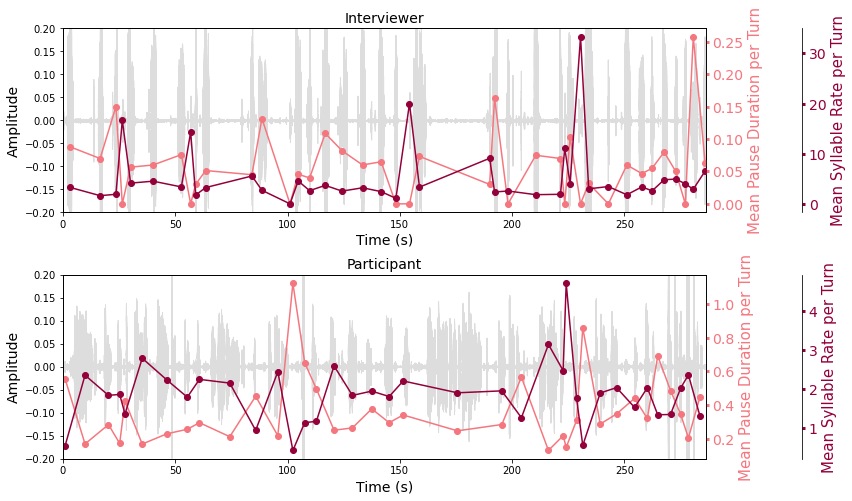

In [16]:
from librosa.display import waveplot

fig, axs = plt.subplots(2, 1, figsize = (12,7))

wavs = [ch1, ch2]
turn_channels = [df_ch1, df_ch2]

colors = ['#f4777f', '#93003a', '#35978f', '#c14f00']
labels = ['Pause Duration', 'Syllable Rate', 'Pitch', 'Loudness', 'Pitch Variability']

for i, ax in enumerate(axs.flatten()):
    
    #plot wav
    wav_plot = waveplot(wavs[i], color = '#dddddd', x_axis = 's', ax = ax)
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Time (s)', size = 14)
    ax.set_ylabel('Amplitude', size = 14)
    
    if i == 0:
        ax.set_title('Interviewer', fontsize = 14)
    else:
        ax.set_title('Participant', fontsize = 14)
    
    #add twin axes
    for j, feature in enumerate(features[:2]):
        twin_ax = ax.twinx()
    
        #select start and end of turn dataframe
        df = turn_channels[i]

        x_ax = []
        for frame in df['name']:

            time = frame.split('-') #start and end times
            start = float(time[0][1:]) #get rid of quotation marks and cast to float
            end = float(time[1][:-1])

            x_ax.append(start + ((end - start) / 2))

        #plot twin plot
        twin_plot, = twin_ax.plot(x_ax, df[feature], 
                                    label = f'Mean {labels[:2][j]} per Turn', color = colors[:2][j], marker = 'o')

        #set colors
        twin_ax.tick_params(axis='y', colors = twin_plot.get_color(), length = 3, width = 3, labelsize = 14)
        twin_ax.yaxis.label.set_color(twin_plot.get_color())

        twin_ax.set_ylabel(f'Mean {labels[:2][j]} per Turn', fontsize = 15)
        
        #twin_ax.set_ylim(0, 0.3)

        if j == 1:
            twin_ax.spines["right"].set_position(("axes", 1.15))
            #twin_ax.set_ylim(0, 15)

plt.tight_layout()

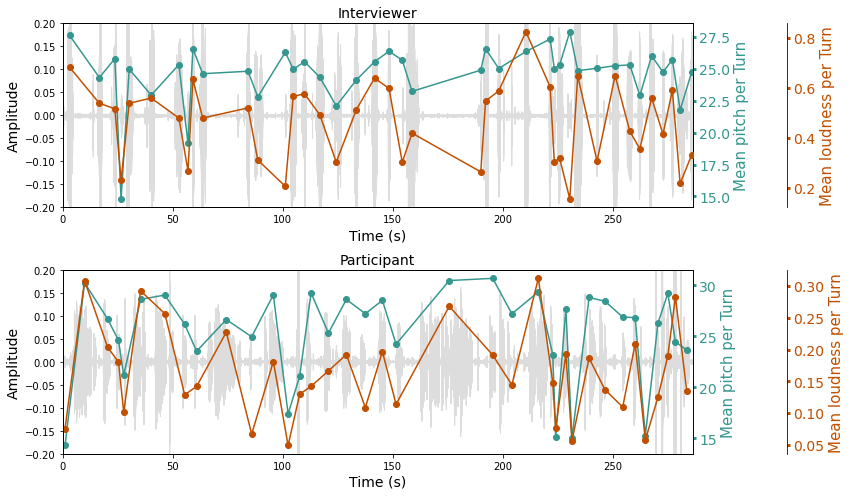

In [17]:
from librosa.display import waveplot

fig, axs = plt.subplots(2, 1, figsize = (12,7))

wavs = [ch1, ch2]
turn_channels = [df_ch1, df_ch2]

colors = ['#f4777f', '#93003a', '#35978f', '#c14f00']
labels = ['pauses', 'syllable rate', 'pitch', 'loudness']
features = [pauses, syll_rate, pitch, loudness]

for i, ax in enumerate(axs.flatten()):
    
    #plot wav
    wav_plot = waveplot(wavs[i], color = '#dddddd', x_axis = 's', ax = ax)
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Time (s)', size = 14)
    ax.set_ylabel('Amplitude', size = 14)
    
    if i == 0:
        ax.set_title('Interviewer', fontsize = 14)
    else:
        ax.set_title('Participant', fontsize = 14)
    
    #add twin axes
    for j, feature in enumerate(features[2:]):
        twin_ax = ax.twinx()
    
        #select start and end of turn dataframe
        df = turn_channels[i]

        x_ax = []
        for frame in df['name']:

            time = frame.split('-') #start and end times
            start = float(time[0][1:]) #get rid of quotation marks and cast to float
            end = float(time[1][:-1])

            x_ax.append(start + ((end - start) / 2))

        #plot twin plot
        twin_plot, = twin_ax.plot(x_ax, df[feature], 
                                    label = f'Mean {labels[2:][j]} per Turn', color = colors[2:][j], marker = 'o')

        #set colors
        twin_ax.tick_params(axis='y', colors = twin_plot.get_color(), length = 3, width = 3, labelsize = 14)
        twin_ax.yaxis.label.set_color(twin_plot.get_color())

        twin_ax.set_ylabel(f'Mean {labels[2:][j]} per Turn', fontsize = 15)
        
        if j == 1:
            twin_ax.spines["right"].set_position(("axes", 1.15))


plt.tight_layout()